# Exercise 4 – Tree-Based Methods

---

## (a) Sketch the Tree from the Left Panel (Partition Plot)


The **left panel** shows a division of the 2D space with:

- Horizontal axis: $X_1$
- Vertical axis: $X_2$
- The space is divided into 5 regions with predicted $Y$ values:
  - Region 1: $X_1 < 0.5$ and $X_2 = 0$ → $Y = 3$
  - Region 2: $0.5 \le X_1 < 1$ and $X_2 = 0$ → $Y = 10$
  - Region 3: $X_1 \ge 1$ and $X_2 = 0$ → $Y = 0$
  - Region 4: $X_1 < 1$ and $X_2 = 1$ → $Y = 15$
  - Region 5: $X_1 \ge 1$ and $X_2 = 1$ → $Y = 5$

### Tree

- If $X_1 < 1$:
  - If $X_1 < 0.5$:
    - If $X_2 = 0$: predict $Y = 3$
    - If $X_2 = 1$: predict $Y = 15$
  - Else:
    - If $X_2 = 0$: predict $Y = 10$
    - If $X_2 = 1$: predict $Y = 15$
- Else ($X_1 \ge 1$):
  - If $X_2 = 0$: predict $Y = 0$
  - If $X_2 = 1$: predict $Y = 5$

                        [X1 < 1]
                        /     \
                    Yes         No
                   /              \
           [X1 < 0.5]           [X2 == 0?]
              /    \             /      \
     [X2 == 0?]  [X2 == 1]   Y = 0      Y = 5
        /   \        |
     Y = 3  Y = 15  Y = 15


In [45]:
# Python implementation
def predict_tree_a(x1, x2):
    if x1 < 1:
        if x1 < 0.5:
            if x2 == 0:
                return 3
            else:
                return 15  # default for X2 = 1
        else:  # 0.5 ≤ x1 < 1
            if x2 == 0:
                return 10
            else:
                return 15
    else:
        if x2 == 0:
            return 0
        else:
            return 5

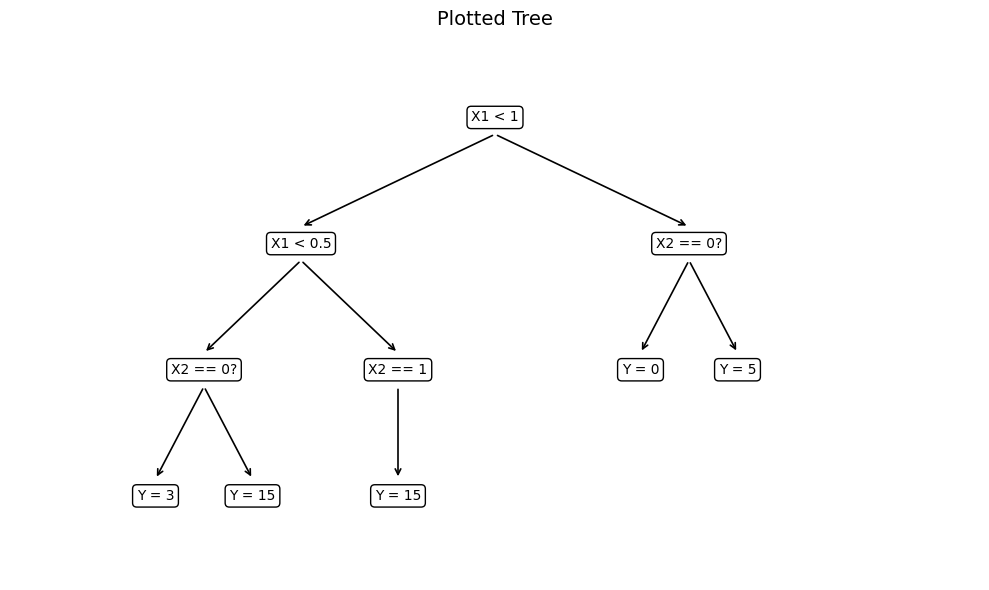

In [46]:
# Plot
import matplotlib.pyplot as plt

def draw_manual_tree_a():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define nodes and positions
    nodes = {
        'A': ('X1 < 1', (0, 0)),
        'B': ('X1 < 0.5', (-2, -1.5)),
        'C1': ('X2 == 0?', (-3, -3)),
        'C2': ('X2 == 1', (-1, -3)),
        'D': ('X2 == 0?', (2, -1.5)),
        'L1': ('Y = 3', (-3.5, -4.5)),
        'L2': ('Y = 15', (-2.5, -4.5)),
        'L3': ('Y = 15', (-1, -4.5)),
        'L4': ('Y = 0', (1.5, -3)),
        'L5': ('Y = 5', (2.5, -3)),
    }

    # Draw nodes
    for node, (label, (x, y)) in nodes.items():
        ax.text(x, y, label, ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white'), fontsize=10)

    # Define edges (parent to child)
    edges = [
        ('A', 'B'), ('A', 'D'),
        ('B', 'C1'), ('B', 'C2'),
        ('C1', 'L1'), ('C1', 'L2'),
        ('C2', 'L3'),
        ('D', 'L4'), ('D', 'L5'),
    ]

    # Draw arrows
    for parent, child in edges:
        x1, y1 = nodes[parent][1]
        x2, y2 = nodes[child][1]
        ax.annotate('', xy=(x2, y2 + 0.2), xytext=(x1, y1 - 0.2),
                    arrowprops=dict(arrowstyle='->', lw=1.2))

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5.5, 1)
    ax.axis('off')
    ax.set_title('Plotted Tree', fontsize=14)
    plt.tight_layout()
    plt.show()

draw_manual_tree_a()


## (b) We are given:
                        [X2 < 1]
                        /     \
                    Yes         No
                   /              \
             [X1 < 1]           [X2 < 2]
              /    \             /     \
     Y = -1.80   Y = 0.63   [X1 < 0]   Else
                                /   \
                        Y = -1.06  Y = 0.21
                                            \
                                         Y = 2.49


In [47]:
# Python implementation
def predict_tree_b(x1, x2):
    if x2 < 1:
        return -1.80 if x1 < 1 else 0.63
    elif x2 < 2:
        return -1.06 if x1 < 0 else 0.21
    else:
        return 2.49

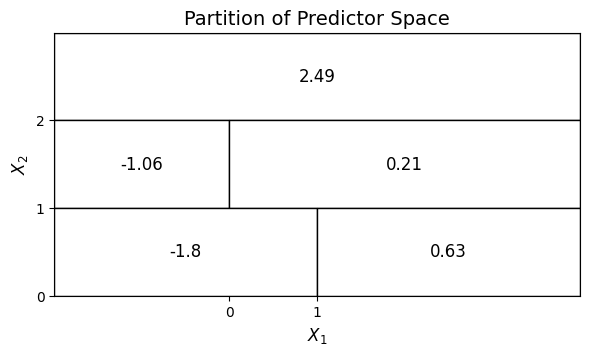

In [48]:
# Plotting the partition of predictor space for (b)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a partition plot for part (b) based on the decision tree from the right panel of Figure 8.14
fig, ax = plt.subplots(figsize=(6, 4))

# Define each region as a rectangle (x, y, width, height, value)
regions = [
    (-2, 2, 6, 1, 2.49),     # X2 >= 2
    (-2, 1, 2, 1, -1.06),    # 1 <= X2 < 2 and X1 < 0
    (0, 1, 4, 1, 0.21),      # 1 <= X2 < 2 and X1 >= 0
    (-2, 0, 3, 1, -1.80),    # X2 < 1 and X1 < 1
    (1, 0, 3, 1, 0.63)       # X2 < 1 and X1 >= 1
]

# Draw each region
for x, y, w, h, value in regions:
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='white'))
    ax.text(x + w/2, y + h/2, f'{value}', ha='center', va='center', fontsize=12)

# Label axes and style plot
ax.set_xlim(-2, 4)
ax.set_ylim(0, 3)
ax.set_xlabel('$X_1$', fontsize=12)
ax.set_ylabel('$X_2$', fontsize=12)
ax.set_title('Partition of Predictor Space', fontsize=14)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1, 2])
ax.set_aspect('equal')
plt.grid(False)
plt.tight_layout()

plt.show()


# Question 9

In [49]:
# a) Create training and test set
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the OJ dataset
from ISLP import load_data
OJ = load_data('OJ')

# Encode the categorical response
OJ['Purchase'] = OJ['Purchase'].astype('category')

# Split the dataset
train_OJ, test_OJ = train_test_split(OJ, train_size=800, random_state=1, stratify=OJ['Purchase'])


In [50]:
# (b) Fit a classification tree and report training error rate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separate predictors and response
X_train = train_OJ.drop(columns='Purchase')
y_train = train_OJ['Purchase']

# Convert categorical vars to dummies
X_train = pd.get_dummies(X_train)

# Fit the tree
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Training error
y_train_pred = tree.predict(X_train)
train_error = 1 - accuracy_score(y_train, y_train_pred)
print("Training error rate:", train_error)


Training error rate: 0.012499999999999956


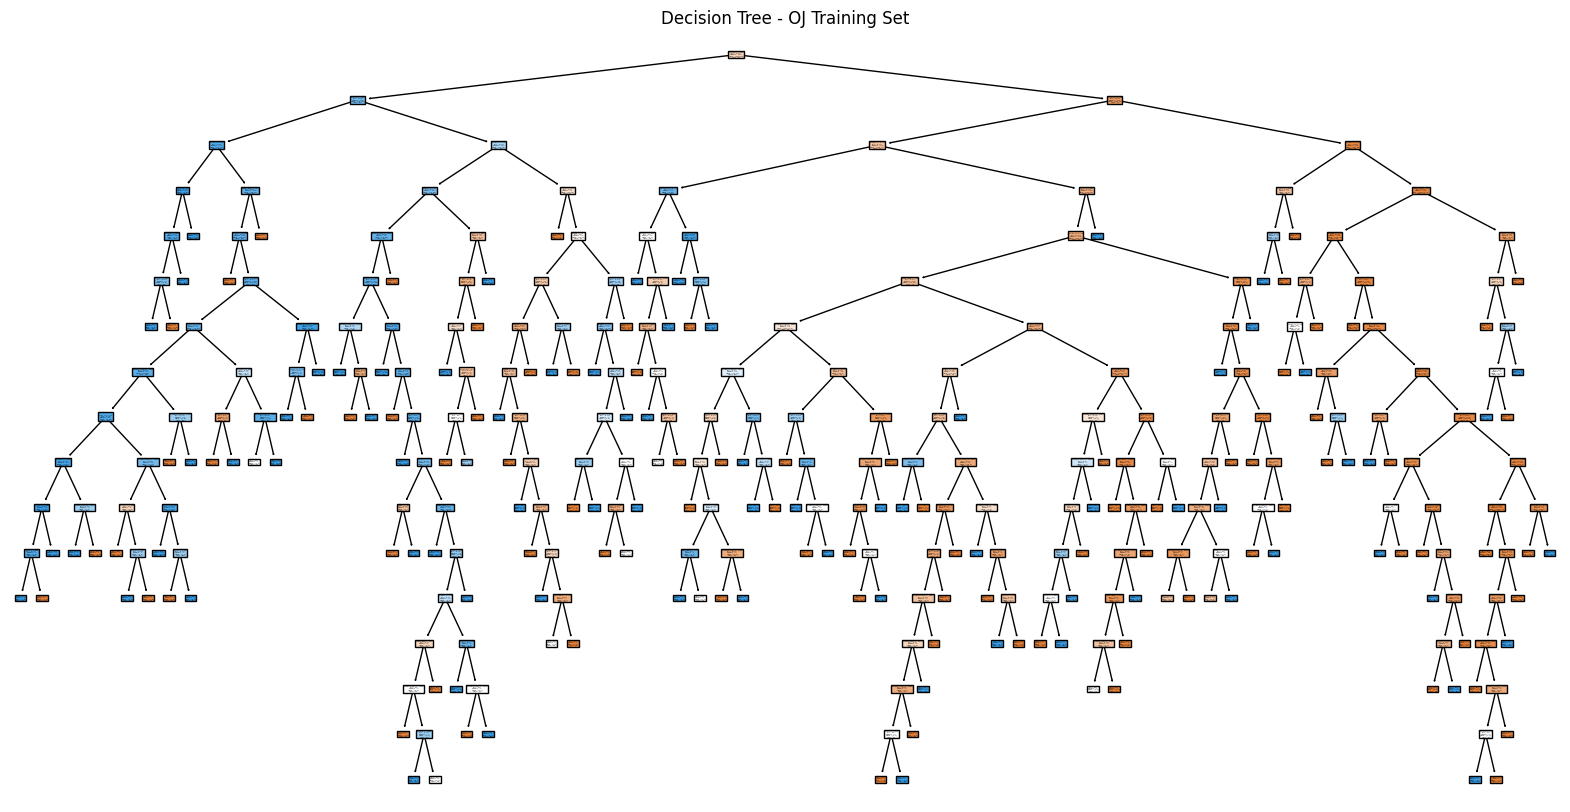

Number of terminal nodes (leaves): 170


In [51]:
# (c) Plot and interpret the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=tree.classes_)
plt.title("Decision Tree - OJ Training Set")
plt.show()

# Terminal node count
n_leaves = tree.get_n_leaves()
print("Number of terminal nodes (leaves):", n_leaves)


In [52]:
# (d) Use export_text to inspect one node
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- LoyalCH <= 0.45
|   |--- LoyalCH <= 0.26
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |   |--- class: CH
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: MM
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- SalePriceMM <= 2.26
|   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |   |   |--- class: CH
|   |   |   |   |--- LoyalCH >  0.04
|   |   |   |   |   |--- LoyalCH <= 0.21
|   |   |   |   |   |   |--- LoyalCH <= 0.18
|   |   |   |   |   |   |   |--- WeekofPurchase <= 265.50
|   |   |   |   |   |   |   |   |--- Store7_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- PriceDiff <= 0.33
|   |   |   |   |   |   |   |   |   |   |--- LoyalCH <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branc

In [53]:
# (e) Predict on test set and show confusion matrix & test error
from sklearn.metrics import confusion_matrix

X_test = pd.get_dummies(test_OJ.drop(columns='Purchase'))
y_test = test_OJ['Purchase']

# Ensure same columns in test set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_test_pred = tree.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Test error rate:", test_error)


Confusion Matrix:
[[137  28]
 [ 31  74]]
Test error rate: 0.21851851851851856


In [54]:
# (f) Use cross-validation to determine optimal tree size
from sklearn.model_selection import cross_val_score

# Try different max_depth values
depths = range(1, 20)
cv_scores = [1 - cross_val_score(DecisionTreeClassifier(max_depth=d, random_state=1), 
                                  X_train, y_train, cv=10).mean() for d in depths]


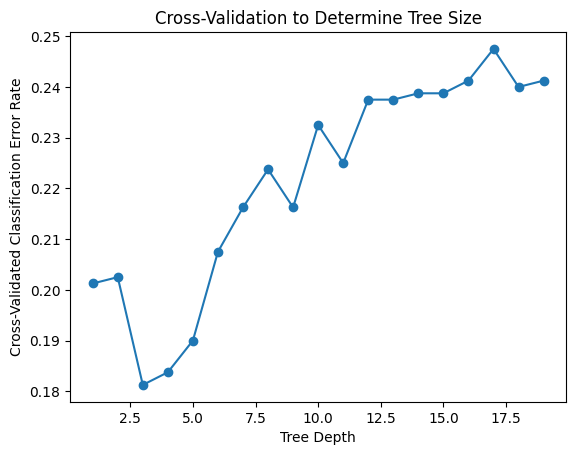

In [55]:
# (g) Plot tree size vs. CV error
plt.plot(depths, cv_scores, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.title('Cross-Validation to Determine Tree Size')
plt.show()


In [56]:
# (h) Lowest cross-validated error
best_depth = depths[cv_scores.index(min(cv_scores))]
print("Best depth with lowest CV error:", best_depth)


Best depth with lowest CV error: 3


In [57]:
# (i) Prune the tree to optimal size
# Fit a pruned tree with best depth
pruned_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
pruned_tree.fit(X_train, y_train)

manual_pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=1)
manual_pruned_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
# (j) Compare training error (pruned vs unpruned)
y_train_pred_pruned = pruned_tree.predict(X_train)
train_error_pruned = 1 - accuracy_score(y_train, y_train_pred_pruned)

print("Training error - Unpruned:", train_error)
print("Training error - Pruned:", train_error_pruned)

Training error - Unpruned: 0.012499999999999956
Training error - Pruned: 0.16125


In [59]:
# (k) Compare test error (pruned vs unpruned)
y_test_pred_pruned = pruned_tree.predict(X_test)
test_error_pruned = 1 - accuracy_score(y_test, y_test_pred_pruned)

print("Test error - Unpruned:", test_error)
print("Test error - Pruned:", test_error_pruned)

Test error - Unpruned: 0.21851851851851856
Test error - Pruned: 0.17407407407407405


# Question 12

In [60]:
from ISLP import load_data
from sklearn.model_selection import train_test_split

df = load_data('OJ')
df['Purchase'] = df['Purchase'].astype('category')
X = pd.get_dummies(df.drop(columns='Purchase'))
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [61]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
print("Logistic Regression Accuracy:", logreg_acc)

Logistic Regression Accuracy: 0.838006230529595


In [62]:
# 2. Bagging
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))
print("Bagging Accuracy:", bagging_acc)

Bagging Accuracy: 0.8068535825545171


In [63]:
# 3. Random Forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8130841121495327


In [64]:
# 4. Boosting
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boost.fit(X_train, y_train)
boost_acc = accuracy_score(y_test, boost.predict(X_test))
print("Boosting Accuracy:", boost_acc)


Boosting Accuracy: 0.8286604361370716


In [ ]:
# 4. BART
from bartpy.sklearnmodel import SklearnModel
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert to NumPy arrays
X_train_np = X_train.to_numpy().astype(np.float64)
X_test_np = X_test.to_numpy().astype(np.float64)
y_train_np = (y_train == 'CH').astype(int).to_numpy()  # Encode 'CH' as 1
y_test_np = (y_test == 'CH').astype(int).to_numpy()

# Initialize and train the BART model
bart_model = SklearnModel()
bart_model.fit(X_train_np, y_train_np)

# Predict on test data
y_test_pred_bart = bart_model.predict(X_test_np)

# Evaluate accuracy
y_test_pred_bart_binary = (y_test_pred_bart >= 0.5).astype(int)
bart_acc = accuracy_score(y_test_np, y_test_pred_bart_binary)
print("BART Accuracy:", round(bart_acc, 4))

# Confusion matrix
print("Confusion Matrix (BART):")
print(confusion_matrix(y_test_np, y_test_pred_bart_binary))


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


AttributeError: module 'pymc' has no attribute 'BART'